# Import external and internal modules

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from mpl_toolkits.basemap import Basemap
import math
import zipfile

In [73]:
from modules.utils import *
importlib.reload(modules.utils)
from modules.utils import *

# Read grid data

In [25]:
lat_csv = 'data/latitude_EASE.csv'
lon_csv = 'data/longitude_EASE.csv'
grid = generate_ease_grid(lat_csv, lon_csv)
print(grid.shape)

(361, 361, 2)


# Draw the EASE grid on map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


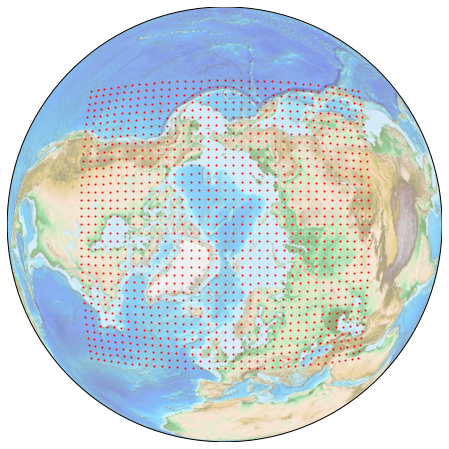

In [26]:
# earth view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='ortho')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


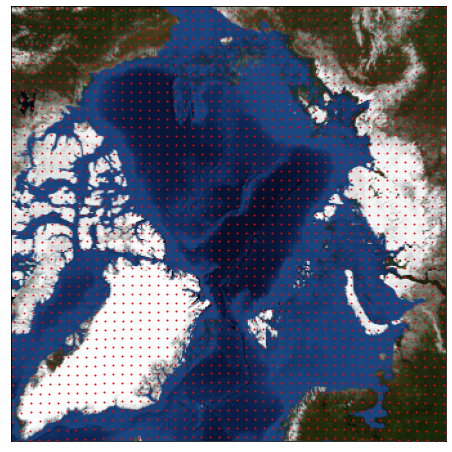

In [27]:
# zoomed view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='stere', grid_res=4, width=5000000, height=5000000)

# convert cartesian coordinates of buoys on the EASE grid to latitude and longitude

In [28]:
x_EASE = 2.3
y_EASE = 4.2
lat,lon = interpolate_coordinate(x_EASE, y_EASE, grid)
print(lat,lon)

31.052952 -135.356344


# Read the sea ice dataset

In [87]:
data = read_dataset('data/DRIFT_DATA_TRAIN.csv')

'''
data cleaning up
'''

# convert x_EASE and y_EASE to lat and lon
# convert velocity components to magnitude and angle
lats = []
lons = []
buoy_vel_mags = []
buoy_vel_dirs = []
wind_vel_mags = []
wind_vel_dirs = []
for index, row in data.iterrows(): 
    # coordinate conversion
    x = row['x_EASE']
    y = row['y_EASE']
    lat, lon = interpolate_coordinate(x, y, grid)
    lats.append(lat)
    lons.append(lon)

    # buoy velocity conversion
    buoy_mag = math.sqrt(row['u_buoy']**2 + row['v_buoy']**2)
    buoy_dir = math.atan(row['v_buoy'] / row['u_buoy'])
    buoy_vel_mags.append(buoy_mag)
    buoy_vel_dirs.append(buoy_dir)

    # wind velocity conversion
    wind_mag = math.sqrt(row['u_ERA5']**2 + row['v_ERA5']**2)
    wind_dir = math.atan(row['v_ERA5'] / row['u_ERA5'])
    wind_vel_mags.append(wind_mag)
    wind_vel_dirs.append(wind_dir)

# add the converted data to dataset
data['buoy_lat'] = lats
data['buoy_lon'] = lons
data['buoy_vel_mag'] = buoy_vel_mags
data['buoy_vel_dir'] = buoy_vel_dirs
data['wind_vel_mag'] = wind_vel_mags
data['wind_vel_dir'] = wind_vel_dirs

# save the converted x_EASE and y_EASE to csv file
data[['buoy_lat', 'buoy_lon', 'buoy_vel_mag', 'buoy_vel_dir', 'wind_vel_mag', 'wind_vel_dir']].to_csv('data/converted.csv', index=False)  

# Visualize the dataset as a time series

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

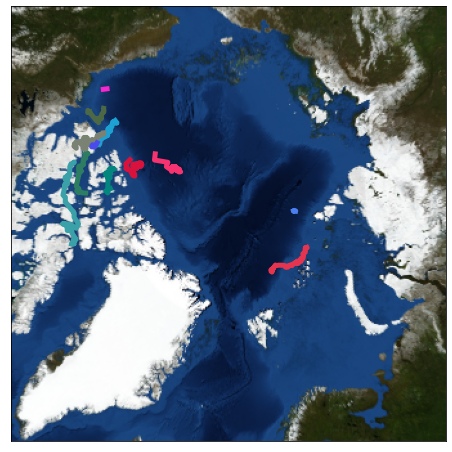

In [76]:
year = 1985
df = data[data['year'] == year]
buoys_list = pd.unique(df['id_buoy'])

fig = plt.figure(figsize=(8, 8), edgecolor='w')
for b in buoys_list:
    df_b = df[df['id_buoy'] == b]
    df_b = df_b[['buoy_lat', 'buoy_lon']]
    lat, lon = df_b['buoy_lat'].to_list(), df_b['buoy_lon'].to_list()

    draw_map(lat, lon, grid, fig, projection='stere', show_grid=False, grid_res=4, width=5000000, height=5000000);

id_buoy
5300     14
5315     12
2416     12
3690     11
5312     11
         ..
44880     1
44960     1
45050     1
45390     1
99800     1
Name: year, Length: 1631, dtype: int64
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow w

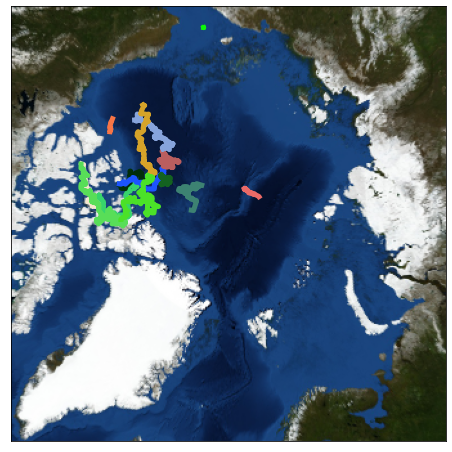

In [83]:
# find the most repeated buoy
dfl = data.groupby('id_buoy')['year'].nunique()
dfl = dfl.sort_values(ascending=False)
print(dfl)

buoy = 5300
df = data[data['id_buoy'] == buoy]
year_list = pd.unique(df['year'])

fig = plt.figure(figsize=(8, 8), edgecolor='w')
for y in year_list:
    df_b = df[df['year'] == y]
    df_b = df_b[['buoy_lat', 'buoy_lon']]
    lat, lon = df_b['buoy_lat'].to_list(), df_b['buoy_lon'].to_list()

    draw_map(lat, lon, grid, fig, projection='stere', show_grid=False, grid_res=4, width=5000000, height=5000000);